In [46]:
from utils import *
from plots import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [47]:
PVALUE = 0.05
DATA_PATH = '../data/gender_personality_models/llm_dark_patterns_claude_3_sonnet.csv'
MODEL_NAME = "Claude_3_Sonnet"
BASELINE_PATH = '../data/LLM_all_enriched_baseline_02.xlsx'

### 1. Load data

In [48]:
df = pd.read_csv(DATA_PATH, decimal=',')
baseline_df = pd.read_excel(BASELINE_PATH)

In [49]:
text_feature_cols = list(df.columns[24:])
baseline_feature_cols = list(baseline_df.columns[8:])

In [50]:
len(text_feature_cols)

86

In [51]:
len(baseline_feature_cols)

84

In [52]:
text_feature_cols = list(set(text_feature_cols).intersection(set(baseline_feature_cols)))
len(text_feature_cols)

80

In [53]:
female_df, male_df = prepare_dfs(df, text_feature_cols)
baseline_df = baseline_df[text_feature_cols].astype("float")

### 2. Perform Wilcoxon test

In [54]:
wilcoxon_pvalues = compute_wilcoxon_pvalues(female_df, male_df, text_feature_cols, MODEL_NAME)

# categorize
wilcoxon_pvalues_0_05 = {feature: pvalue for feature, pvalue in wilcoxon_pvalues.items() if pvalue < PVALUE}
wilcoxon_pvalues_0_95 = {feature: pvalue for feature, pvalue in wilcoxon_pvalues.items() if pvalue >= PVALUE}

### 3. Distribution plots

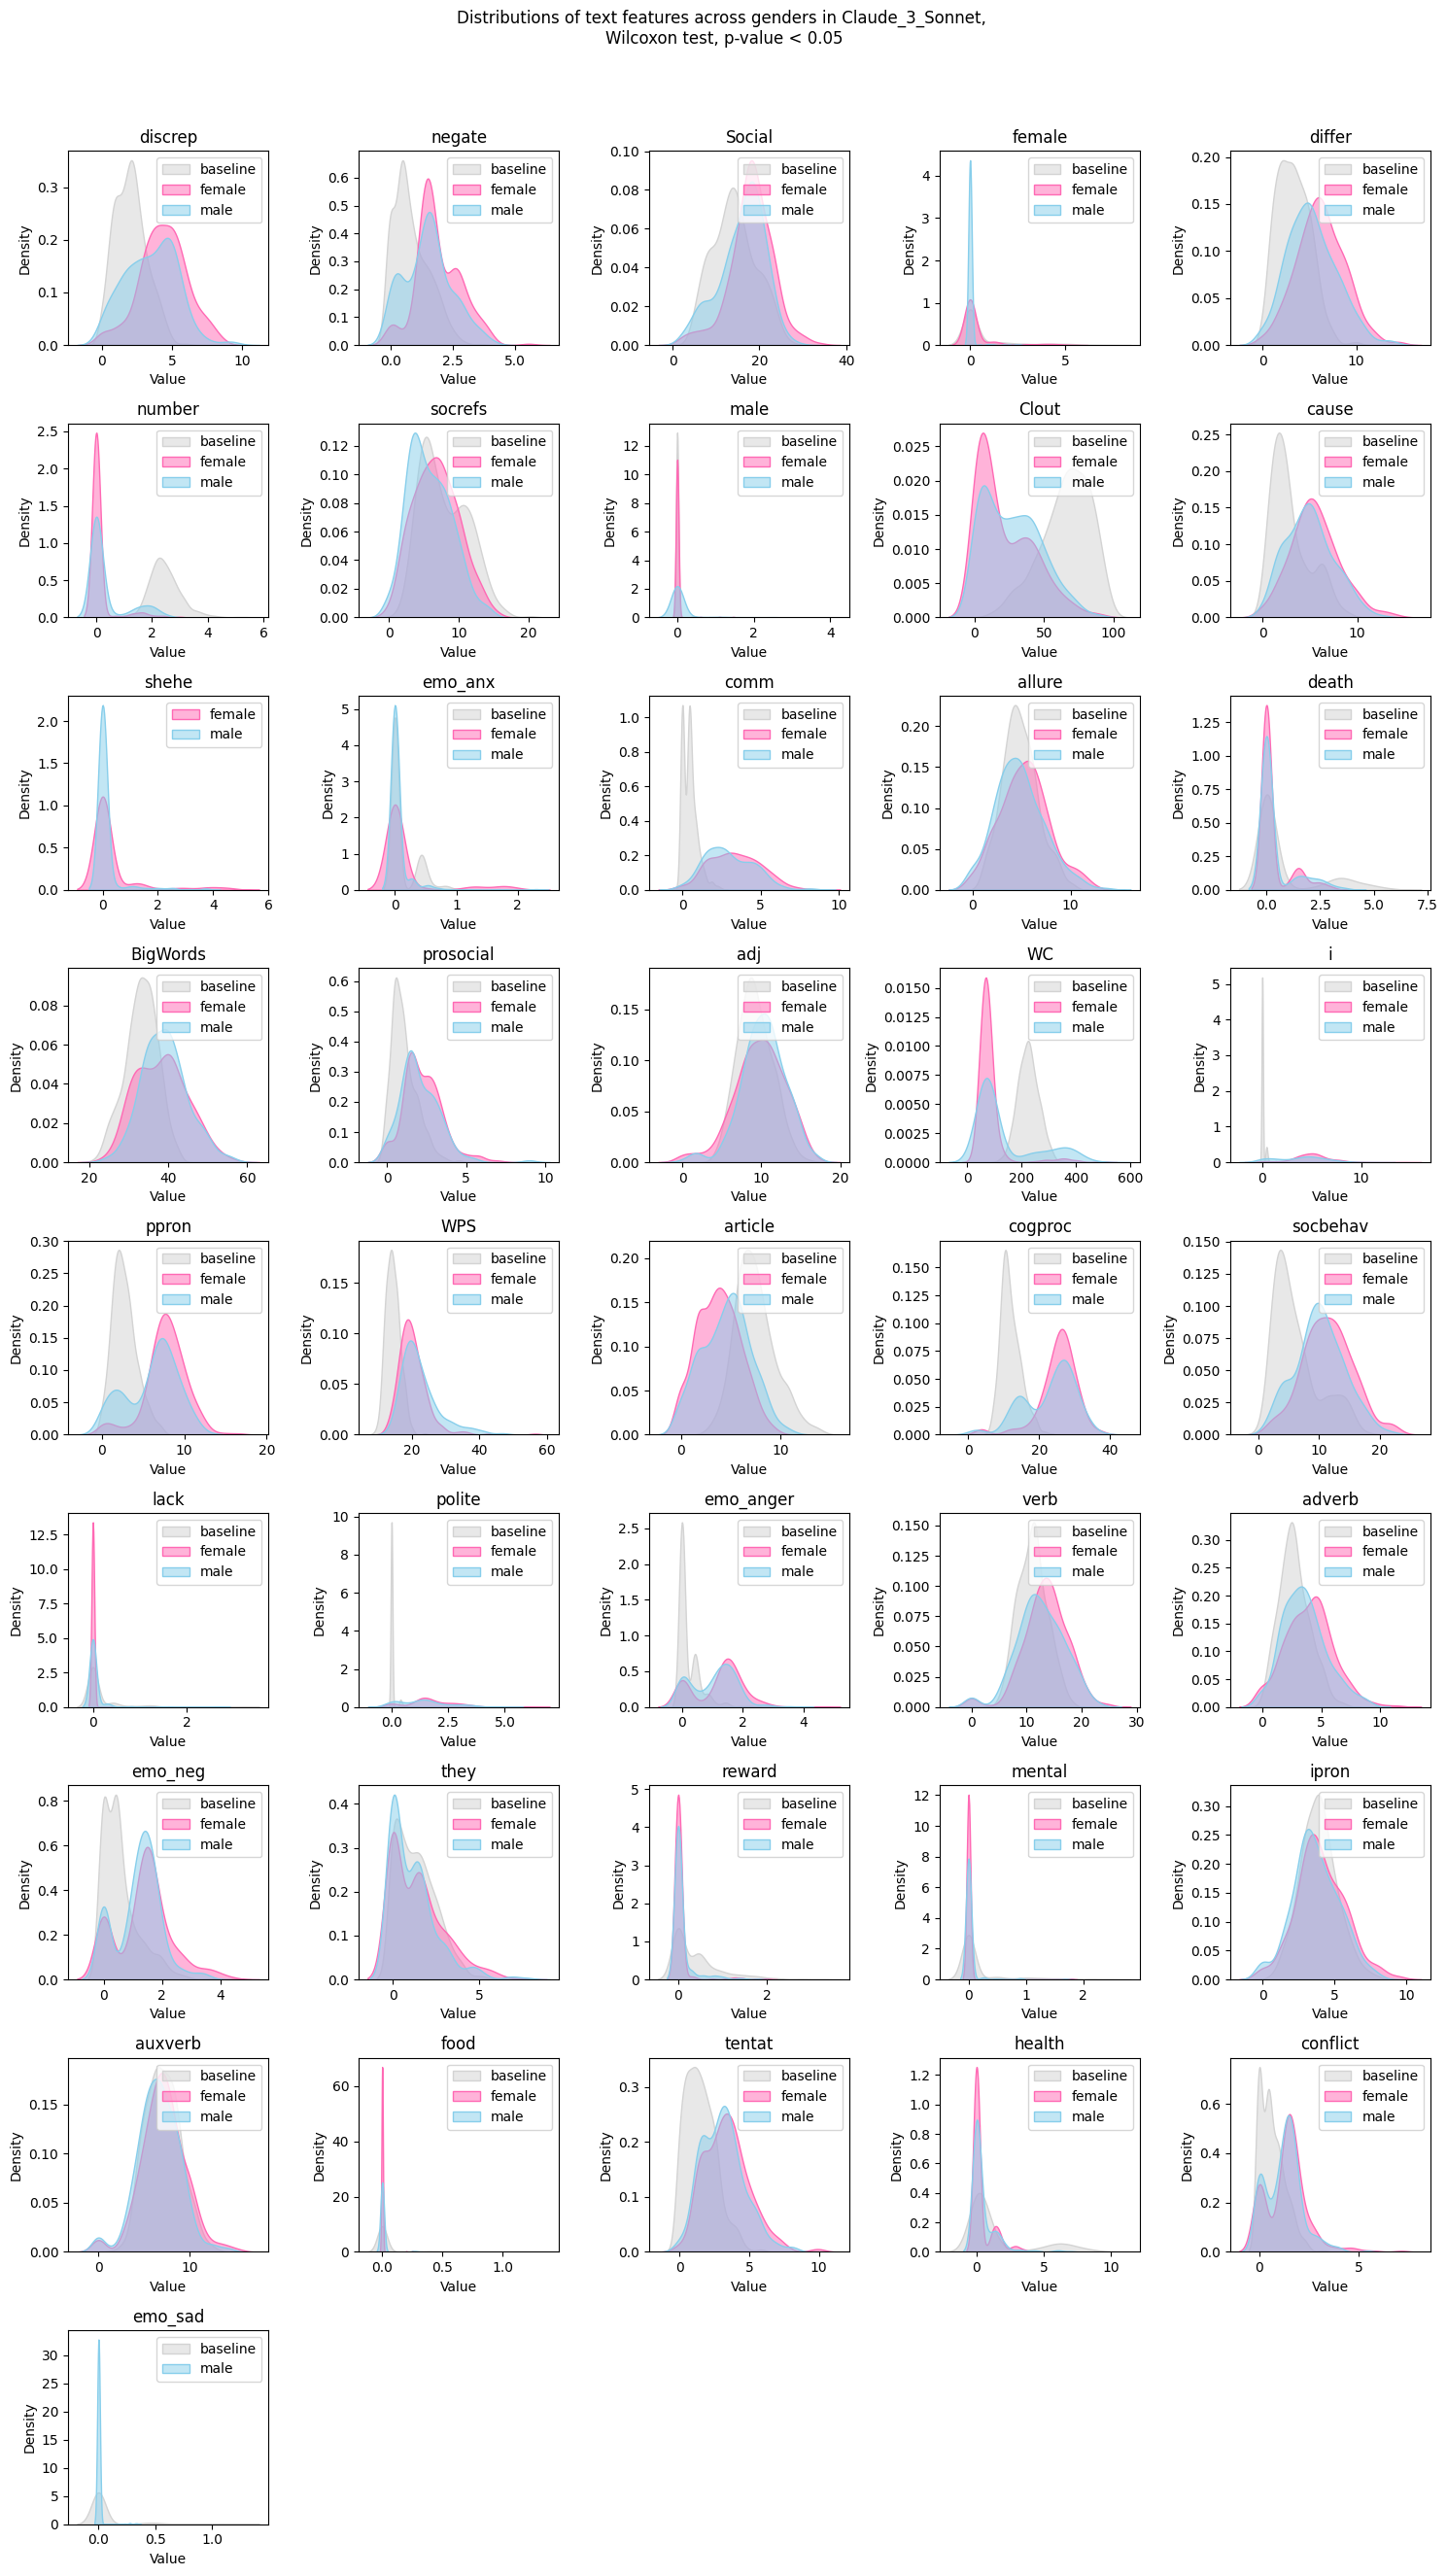

In [55]:
plot_features_distribution(male_df, female_df, baseline_df, wilcoxon_pvalues_0_05, PVALUE, MODEL_NAME)

### 4. Plot Cohen's d

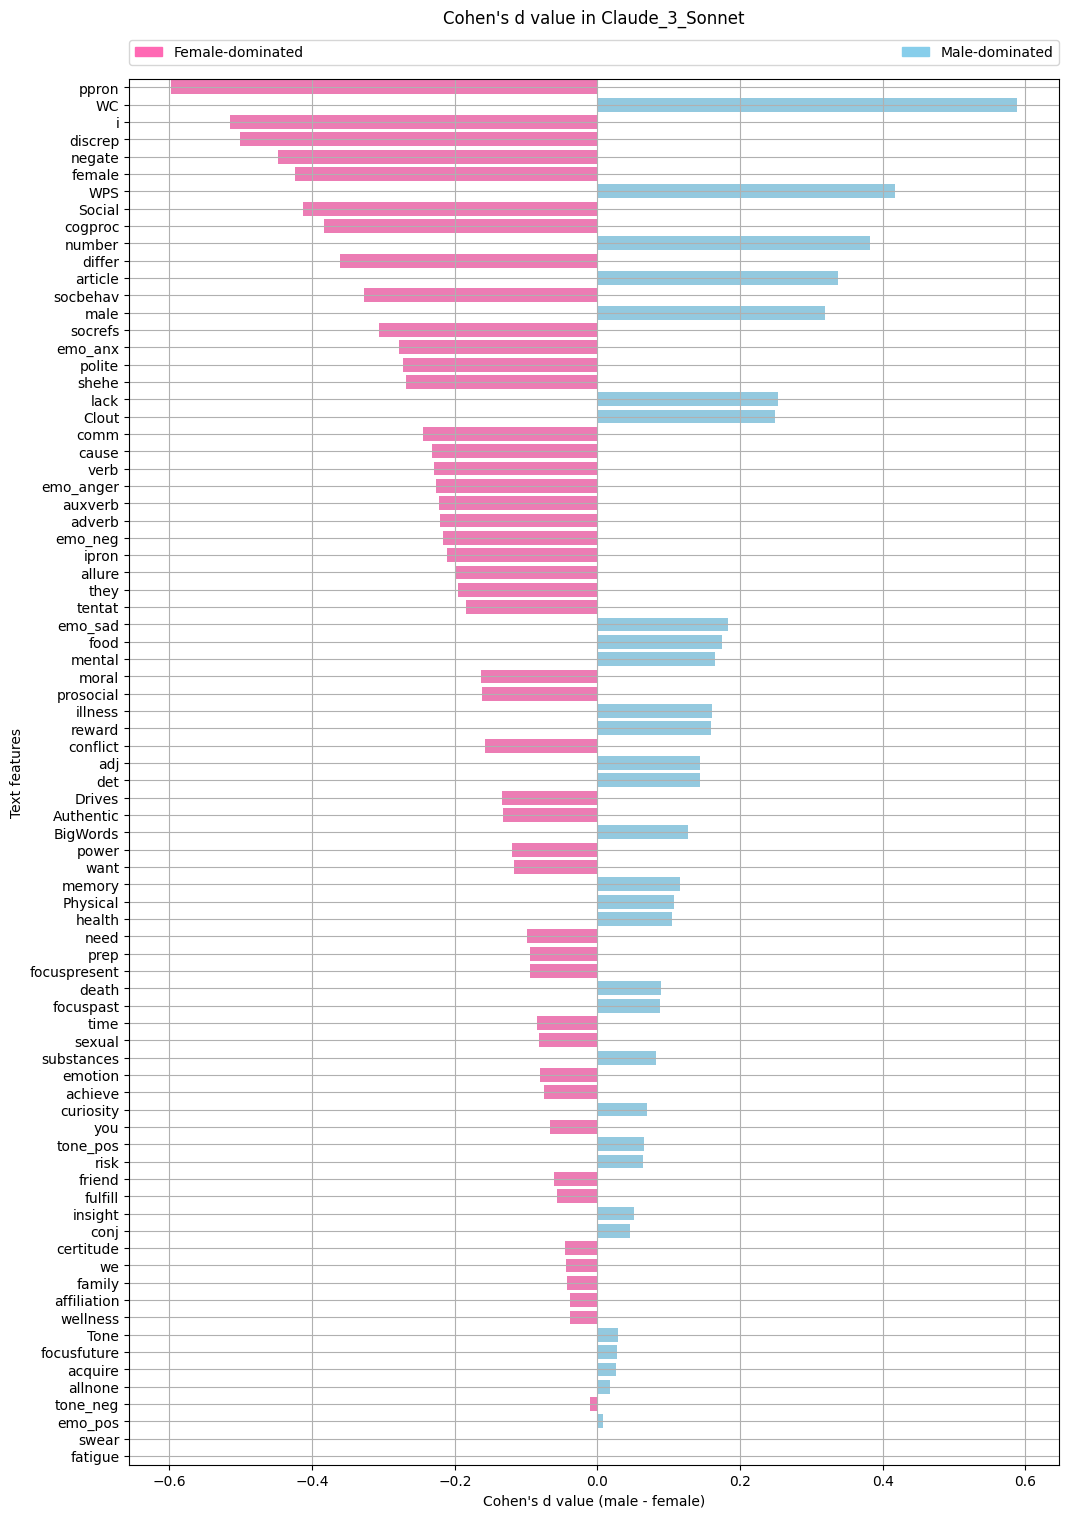

In [56]:
# Compute cohen's ds
sorted_cohens_ds = get_sorted_cohens_d(male_df, female_df, text_feature_cols, MODEL_NAME)

plot_cohens_d_features(sorted_cohens_ds, MODEL_NAME)

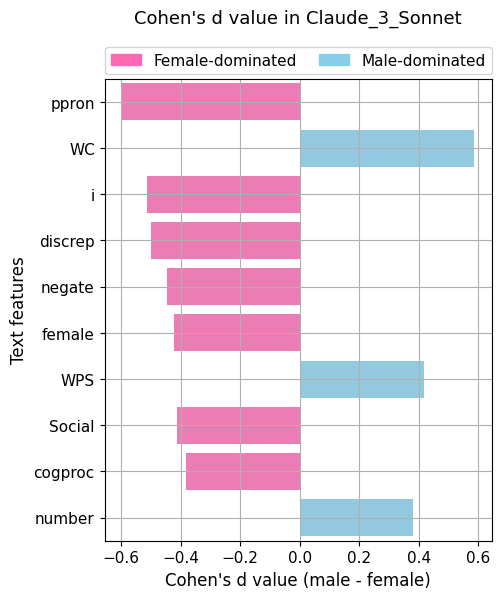

In [57]:
top_sorted_cohens_ds = {key: value for i, (key, value) in enumerate(sorted_cohens_ds.items()) if i < 10}

sorted_features = list(top_sorted_cohens_ds.keys())
sorted_values = list(top_sorted_cohens_ds.values())
    
sorted_colors = ["skyblue" if val > 0 else "hotpink" for val in sorted_values]

figsize = (5, 6)
fig, ax = plt.subplots(figsize=figsize)

sns.barplot(
    y=sorted_features,
    x=sorted_values,
    palette=sorted_colors,
    ax=ax,
)

ax.set_xlabel("Cohen's d value (male - female)", fontsize=12)
ax.set_ylabel("Text features", fontsize=12)
ax.grid()

legend_patches = [
    mpatches.Patch(color="hotpink", label="Female-dominated"),
    mpatches.Patch(color="skyblue", label="Male-dominated"),
]

ax.tick_params(axis='both', labelsize=11)

ax.legend(
    handles=legend_patches,
    loc="lower left",
    mode="expand",
    borderaxespad=0.0,
    ncol=2,
    bbox_to_anchor=(0.0, 1.01, 1.0, 0.102),
    fontsize=11
)
ax.set_title(f"Cohen's d value in {MODEL_NAME}", pad=40, fontsize=13)

plt.show()